# MondoMarket Analysis

***

## Project Description

In this task, it is your job to get up to speed with the background context of MondoMarket and to analyse the datasets containing financial information to uncover a channel with high potential for MondoMarket to exploit for small businesses. There are 2 datasets provided, one contains daily sales data for 10 of MondoMarkets largest competitors within the e-commerce industry. The second contains information about the 10 competitors' monthly costs. 

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy.stats
from collections import Counter

import sklearn
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
# from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
#import feature_engine
#from feature_engine import imputation as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df1 = pd.read_csv("competitor_daily_sales.csv", parse_dates=["date"])

In [3]:
df1

,company,date,location,market,channel,product_category,total_sale_amount
0,0b466a81-1df4-4799-9d0e-f472513c0c64,2021-03-02,Swansea,large businesses,business-to-consumer,laptops,209.68
1,0b466a81-1df4-4799-9d0e-f472513c0c64,2021-04-16,Glasgow,medium sized business,business-to-consumer,desks,414.80
2,0b466a81-1df4-4799-9d0e-f472513c0c64,2021-02-17,Bradford,large businesses,business-to-consumer,action figures,534.66
3,0b466a81-1df4-4799-9d0e-f472513c0c64,2021-05-09,Chelmsford,medium sized business,business-to-consumer,inflatable pool,1086.48
4,0b466a81-1df4-4799-9d0e-f472513c0c64,2021-04-27,Salisbury,medium sized business,business-to-consumer,long life food,410.34
...,...,...,...,...,...,...,...
2503,47924ca7-985c-403b-9d85-c93bf0e7ce32,2021-03-09,Inverness,medium sized business,business-to-business,labouring,2350.48
2504,47924ca7-985c-403b-9d85-c93bf0e7ce32,2021-02-24,Chelmsford,small business,business-to-business,legal,673.84
2505,47924ca7-985c-403b-9d85-c93bf0e7ce32,2021-04-07,Leicester,large businesses,business-to-business,labouring,1024.83
2506,47924ca7-985c-403b-9d85-c93bf0e7ce32,2021-04-16,Perth,small business,business-to-business,labouring,859.41


In [4]:
df1a = df1[df1["market"] == "small business"]

In [5]:
sale_df = df1a.groupby("company").sum().nlargest(columns="total_sale_amount", n=10)
sale_df
sale_df.reset_index(inplace=True)
sale_df

,company,total_sale_amount
0,3884b3b4-881f-43fa-a801-c4ec459fb8dd,135028.98
1,d12c20d2-2abd-46f2-babd-984eb96a6576,131483.36
2,d3ecaa13-39c2-4525-ad5f-79d2dc755ef7,129275.68
3,bd827125-511f-4ab9-a1b0-c1bb73218c41,125018.62
4,3af5cfce-3d49-4a3f-b94d-bcd9176a92f6,122988.92
5,ab26de37-713d-42d5-b20d-3a769d43da67,121005.21
6,145446d2-9e45-4473-bb68-835ab651dc56,120543.03
7,1f0662dd-92d2-452c-9ac2-b506161db987,116640.87
8,0b466a81-1df4-4799-9d0e-f472513c0c64,105795.90
9,47924ca7-985c-403b-9d85-c93bf0e7ce32,93375.28


In [6]:
df1a.groupby("channel").sum()

,total_sale_amount
channel,
business-to-business,594194.94
business-to-consumer,606960.91


In [7]:
df1a.groupby("product_category").sum().nlargest(columns="total_sale_amount", n=5)

,total_sale_amount
product_category,
metals,70265.49
plastic,60134.20
legal,59000.22
technology implementation,56002.62
labouring,50633.27


In [8]:
df1a.groupby("location").sum().nlargest(columns="total_sale_amount", n=5)

,total_sale_amount
location,
Nottingham,33287.43
Londonderry,29719.82
Perth,29656.33
Canterbury,29426.88
St Albans,29324.23


In [9]:
df2 = pd.read_csv("competitor_monthly_costs.csv")

In [10]:
df2.head()

,company,year,month,fixed_costs_for_b2b_sales,fixed_costs_for_b2c_sales,variable_costs_for_b2b_sales,variable_costs_for_b2c_sales
0,0b466a81-1df4-4799-9d0e-f472513c0c64,2021,2,14.20,65.65,744.15,56.92
1,0b466a81-1df4-4799-9d0e-f472513c0c64,2021,3,99.90,33.00,159.49,68.37
2,0b466a81-1df4-4799-9d0e-f472513c0c64,2021,4,55.62,15.45,166.58,43.71
3,0b466a81-1df4-4799-9d0e-f472513c0c64,2021,5,40.61,33.82,374.63,19.03
4,0b466a81-1df4-4799-9d0e-f472513c0c64,2021,6,72.87,77.24,565.97,85.29


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   company                       60 non-null     object 
 1   year                          60 non-null     int64  
 2   month                         60 non-null     int64  
 3   fixed_costs_for_b2b_sales     60 non-null     float64
 4   fixed_costs_for_b2c_sales     60 non-null     float64
 5   variable_costs_for_b2b_sales  60 non-null     float64
 6   variable_costs_for_b2c_sales  60 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 3.4+ KB


In [12]:
df2.describe(include='all')

,company,year,month,fixed_costs_for_b2b_sales,fixed_costs_for_b2c_sales,variable_costs_for_b2b_sales,variable_costs_for_b2c_sales
count,60,60.00,60.00,60.00,60.00,60.00,60.00
unique,10,NaN,NaN,NaN,NaN,NaN,NaN
top,145446d2-9e45-4473-bb68-835ab651dc56,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2021.00,4.50,54.55,55.59,531.84,56.44
std,NaN,0.00,1.72,24.90,26.75,261.12,24.72
min,NaN,2021.00,2.00,10.27,10.91,101.50,12.67
25%,NaN,2021.00,3.00,34.27,32.96,304.01,36.04
50%,NaN,2021.00,4.50,54.94,56.55,551.67,56.70
75%,NaN,2021.00,6.00,76.00,79.62,748.13,75.23


In [13]:
df2.drop(["year","month"], axis=1, inplace=True)

### Groupby Function

In [14]:
df2.groupby("company").sum()

,fixed_costs_for_b2b_sales,fixed_costs_for_b2c_sales,variable_costs_for_b2b_sales,variable_costs_for_b2c_sales
company,,,,
0b466a81-1df4-4799-9d0e-f472513c0c64,316.95,301.96,2704.99,369.09
145446d2-9e45-4473-bb68-835ab651dc56,295.38,370.72,3575.73,243.97
1f0662dd-92d2-452c-9ac2-b506161db987,310.63,350.36,1855.91,427.18
3884b3b4-881f-43fa-a801-c4ec459fb8dd,334.35,409.57,3572.45,436.52
3af5cfce-3d49-4a3f-b94d-bcd9176a92f6,381.91,292.62,3191.61,340.94
47924ca7-985c-403b-9d85-c93bf0e7ce32,323.37,304.84,2434.66,325.57
ab26de37-713d-42d5-b20d-3a769d43da67,248.36,272.52,3417.87,320.11
bd827125-511f-4ab9-a1b0-c1bb73218c41,389.77,401.65,3722.78,299.68
d12c20d2-2abd-46f2-babd-984eb96a6576,275.80,255.03,3790.71,329.52


In [15]:
df3 = df2.groupby("company").sum()
df3

,fixed_costs_for_b2b_sales,fixed_costs_for_b2c_sales,variable_costs_for_b2b_sales,variable_costs_for_b2c_sales
company,,,,
0b466a81-1df4-4799-9d0e-f472513c0c64,316.95,301.96,2704.99,369.09
145446d2-9e45-4473-bb68-835ab651dc56,295.38,370.72,3575.73,243.97
1f0662dd-92d2-452c-9ac2-b506161db987,310.63,350.36,1855.91,427.18
3884b3b4-881f-43fa-a801-c4ec459fb8dd,334.35,409.57,3572.45,436.52
3af5cfce-3d49-4a3f-b94d-bcd9176a92f6,381.91,292.62,3191.61,340.94
47924ca7-985c-403b-9d85-c93bf0e7ce32,323.37,304.84,2434.66,325.57
ab26de37-713d-42d5-b20d-3a769d43da67,248.36,272.52,3417.87,320.11
bd827125-511f-4ab9-a1b0-c1bb73218c41,389.77,401.65,3722.78,299.68
d12c20d2-2abd-46f2-babd-984eb96a6576,275.80,255.03,3790.71,329.52


In [16]:
df3.columns

Index(['fixed_costs_for_b2b_sales', 'fixed_costs_for_b2c_sales', 'variable_costs_for_b2b_sales', 'variable_costs_for_b2c_sales'], dtype='object')

In [17]:
df3["b2b_total_costs"] = df3["fixed_costs_for_b2b_sales"] + df3["variable_costs_for_b2b_sales"]

In [18]:
df3["b2c_total_costs"] = df3["fixed_costs_for_b2c_sales"] + df3["variable_costs_for_b2c_sales"]

In [19]:
df3.reset_index(inplace=True)
df3

,company,fixed_costs_for_b2b_sales,fixed_costs_for_b2c_sales,variable_costs_for_b2b_sales,variable_costs_for_b2c_sales,b2b_total_costs,b2c_total_costs
0,0b466a81-1df4-4799-9d0e-f472513c0c64,316.95,301.96,2704.99,369.09,3021.94,671.05
1,145446d2-9e45-4473-bb68-835ab651dc56,295.38,370.72,3575.73,243.97,3871.11,614.69
2,1f0662dd-92d2-452c-9ac2-b506161db987,310.63,350.36,1855.91,427.18,2166.54,777.54
3,3884b3b4-881f-43fa-a801-c4ec459fb8dd,334.35,409.57,3572.45,436.52,3906.80,846.09
4,3af5cfce-3d49-4a3f-b94d-bcd9176a92f6,381.91,292.62,3191.61,340.94,3573.52,633.56
5,47924ca7-985c-403b-9d85-c93bf0e7ce32,323.37,304.84,2434.66,325.57,2758.03,630.41
6,ab26de37-713d-42d5-b20d-3a769d43da67,248.36,272.52,3417.87,320.11,3666.23,592.63
7,bd827125-511f-4ab9-a1b0-c1bb73218c41,389.77,401.65,3722.78,299.68,4112.55,701.33
8,d12c20d2-2abd-46f2-babd-984eb96a6576,275.80,255.03,3790.71,329.52,4066.51,584.55
9,d3ecaa13-39c2-4525-ad5f-79d2dc755ef7,396.43,376.07,3643.67,293.56,4040.10,669.63


### Joins in Pandas

In [20]:
df4 = pd.merge(sale_df,df3,on='company')
df4

,company,total_sale_amount,fixed_costs_for_b2b_sales,fixed_costs_for_b2c_sales,variable_costs_for_b2b_sales,variable_costs_for_b2c_sales,b2b_total_costs,b2c_total_costs
0,3884b3b4-881f-43fa-a801-c4ec459fb8dd,135028.98,334.35,409.57,3572.45,436.52,3906.80,846.09
1,d12c20d2-2abd-46f2-babd-984eb96a6576,131483.36,275.80,255.03,3790.71,329.52,4066.51,584.55
2,d3ecaa13-39c2-4525-ad5f-79d2dc755ef7,129275.68,396.43,376.07,3643.67,293.56,4040.10,669.63
3,bd827125-511f-4ab9-a1b0-c1bb73218c41,125018.62,389.77,401.65,3722.78,299.68,4112.55,701.33
4,3af5cfce-3d49-4a3f-b94d-bcd9176a92f6,122988.92,381.91,292.62,3191.61,340.94,3573.52,633.56
5,ab26de37-713d-42d5-b20d-3a769d43da67,121005.21,248.36,272.52,3417.87,320.11,3666.23,592.63
6,145446d2-9e45-4473-bb68-835ab651dc56,120543.03,295.38,370.72,3575.73,243.97,3871.11,614.69
7,1f0662dd-92d2-452c-9ac2-b506161db987,116640.87,310.63,350.36,1855.91,427.18,2166.54,777.54
8,0b466a81-1df4-4799-9d0e-f472513c0c64,105795.90,316.95,301.96,2704.99,369.09,3021.94,671.05
9,47924ca7-985c-403b-9d85-c93bf0e7ce32,93375.28,323.37,304.84,2434.66,325.57,2758.03,630.41


In [21]:
df4["profit"] = df4["total_sale_amount"] - df4["b2b_total_costs"] - df4["b2c_total_costs"]

In [22]:
df4

,company,total_sale_amount,fixed_costs_for_b2b_sales,fixed_costs_for_b2c_sales,variable_costs_for_b2b_sales,variable_costs_for_b2c_sales,b2b_total_costs,b2c_total_costs,profit
0,3884b3b4-881f-43fa-a801-c4ec459fb8dd,135028.98,334.35,409.57,3572.45,436.52,3906.80,846.09,130276.09
1,d12c20d2-2abd-46f2-babd-984eb96a6576,131483.36,275.80,255.03,3790.71,329.52,4066.51,584.55,126832.30
2,d3ecaa13-39c2-4525-ad5f-79d2dc755ef7,129275.68,396.43,376.07,3643.67,293.56,4040.10,669.63,124565.95
3,bd827125-511f-4ab9-a1b0-c1bb73218c41,125018.62,389.77,401.65,3722.78,299.68,4112.55,701.33,120204.74
4,3af5cfce-3d49-4a3f-b94d-bcd9176a92f6,122988.92,381.91,292.62,3191.61,340.94,3573.52,633.56,118781.84
5,ab26de37-713d-42d5-b20d-3a769d43da67,121005.21,248.36,272.52,3417.87,320.11,3666.23,592.63,116746.35
6,145446d2-9e45-4473-bb68-835ab651dc56,120543.03,295.38,370.72,3575.73,243.97,3871.11,614.69,116057.23
7,1f0662dd-92d2-452c-9ac2-b506161db987,116640.87,310.63,350.36,1855.91,427.18,2166.54,777.54,113696.79
8,0b466a81-1df4-4799-9d0e-f472513c0c64,105795.90,316.95,301.96,2704.99,369.09,3021.94,671.05,102102.91
9,47924ca7-985c-403b-9d85-c93bf0e7ce32,93375.28,323.37,304.84,2434.66,325.57,2758.03,630.41,89986.84


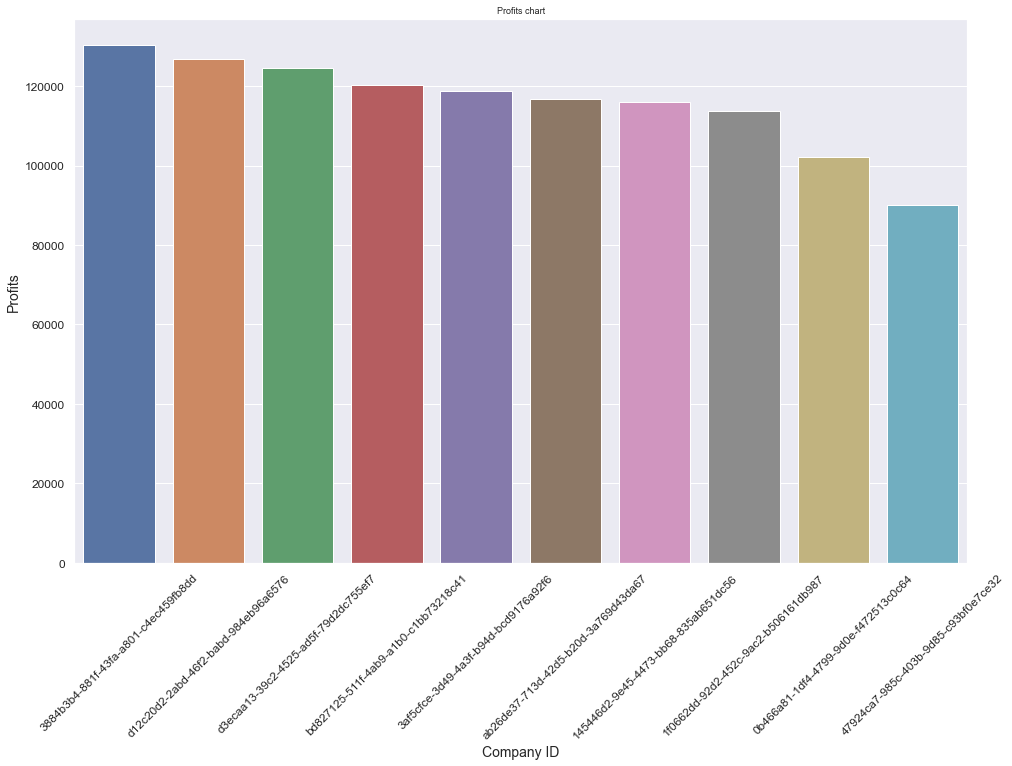

In [23]:
plt.figure(figsize=(16,10))

sns.barplot(x="company", y="profit", data=df4)
plt.title('Profits chart')
plt.tick_params('x', labelrotation=45)
plt.xlabel("Company ID")
plt.ylabel("Profits")


plt.show()

In [24]:
df5 = pd.read_csv("high_priority_usage_data.csv", parse_dates=["date"])

In [25]:
df5

,date,location,IP address,action,interaction,duration,downtime
0,2021-06-29,"67092 Williams Knolls Suite 976\nJasonview, SC...",35.174.116.4,search results,dorment,1.54,0.00
1,2021-05-01,"19831 Hammond Inlet\nDaniellehaven, AZ 11529",196.216.22.169,payment,abandon,76.45,29.14
2,2021-06-22,"4719 Robinson Cliff\nNorth Danielberg, TN 70326",214.54.78.137,business profile view,click,24.99,10.64
3,2021-06-09,"11228 Donald Inlet Suite 768\nLake James, WI 2...",216.64.160.224,hack attempt,brute force password attempt,90.49,11.86
4,2021-06-05,"67817 Combs Lodge Apt. 633\nEast Loriberg, MT ...",207.45.227.130,recommendation,click,40.63,23.62
...,...,...,...,...,...,...,...
5911,2021-06-23,"031 Jackson Glen Apt. 796\nWest Ann, DE 60648",191.220.232.52,hack attempt,phishing,30.09,12.03
5912,2021-04-19,"786 Tiffany Valleys Apt. 565\nFordside, WV 42122",121.101.238.144,purchase,click,14.66,5.73
5913,2021-06-05,"076 Sharp Mount Apt. 785\nAllisonton, AK 86602",60.41.10.197,payment,payment not accepted,84.66,22.60
5914,2021-04-17,"80465 Marshall Ramp\nSouth Stephanie, AZ 23027",68.177.212.161,search results,new search,94.64,46.38


In [26]:
df6 = df5.groupby("action").mean()
df6

,duration,downtime
action,,
API call,50.90,37.96
SSH,51.40,38.12
account,48.43,39.34
admin logon,50.75,38.57
business profile view,48.48,37.33
forum chat,48.93,37.40
hack attempt,49.04,39.03
payment,47.55,37.02
product search,47.46,33.82


In [27]:
df5.groupby("action").mean().sort_values(by="duration")

,duration,downtime
action,,
product search,47.46,33.82
payment,47.55,37.02
unauthorised request,47.90,37.30
account,48.43,39.34
business profile view,48.48,37.33
user logout,48.74,37.09
forum chat,48.93,37.40
hack attempt,49.04,39.03
user signup,49.06,39.82


In [28]:
df5.groupby("action").mean().sort_values(by="downtime")

,duration,downtime
action,,
product search,47.46,33.82
purchase,49.33,35.57
payment,47.55,37.02
user logout,48.74,37.09
recommendation,50.29,37.22
unauthorised request,47.90,37.30
business profile view,48.48,37.33
forum chat,48.93,37.40
API call,50.90,37.96


## Data Visualization

In [29]:
df6.columns

Index(['duration', 'downtime'], dtype='object')

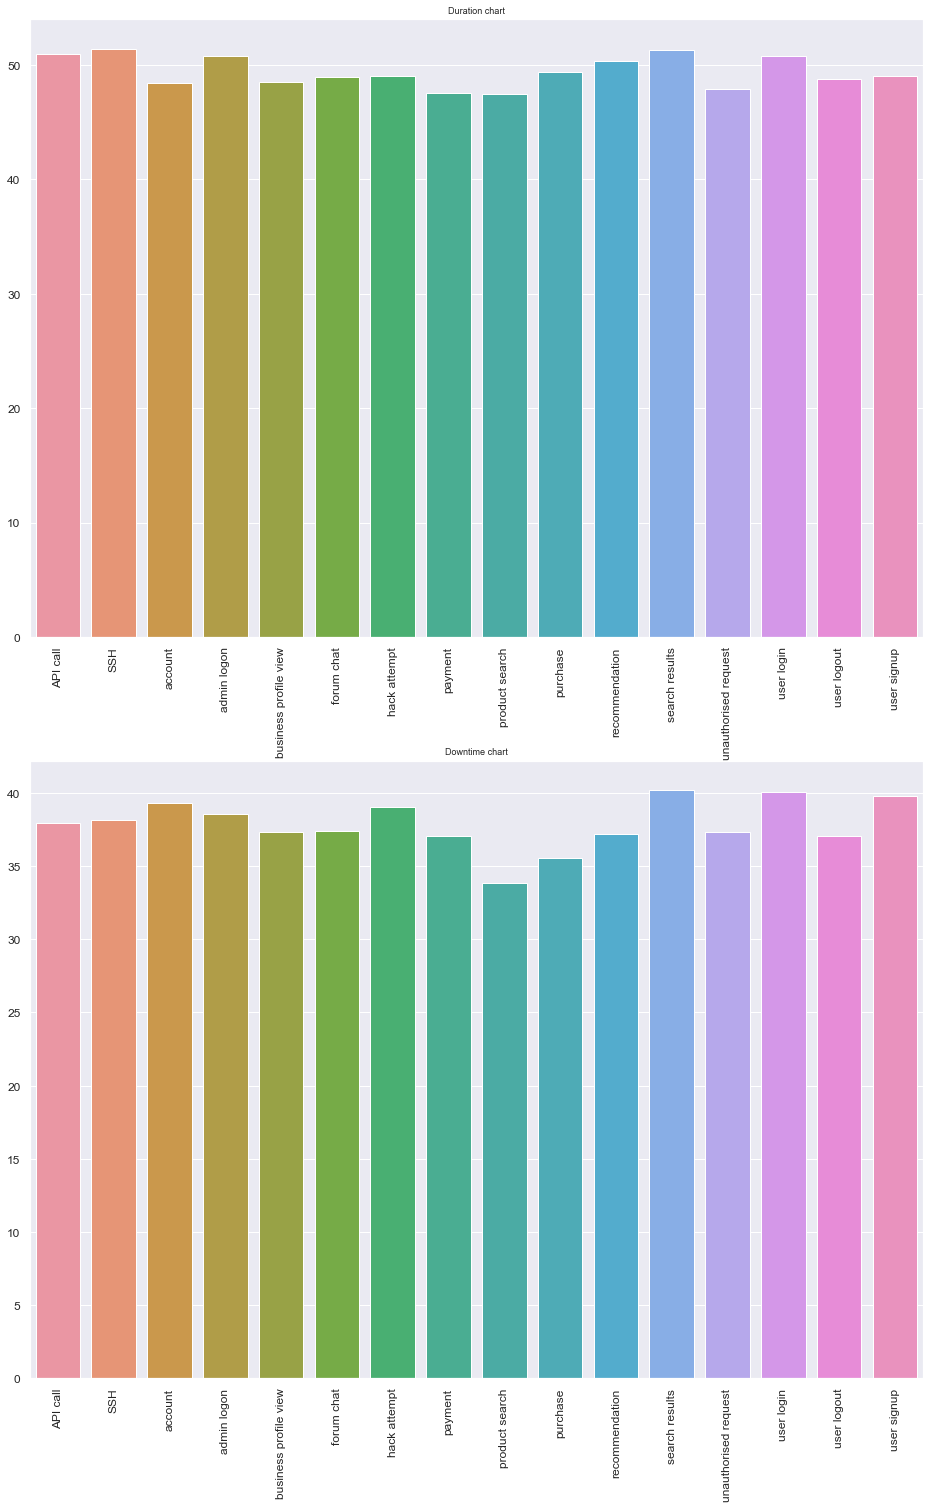

In [30]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(2,1, sharex=False, figsize=(16,25))
#fig.suptitle('Main Title')


sns.barplot(x=df6.index, y="duration", data=df6, ax=ax[0])
ax[0].set_title('Duration chart')
ax[0].tick_params('x', labelrotation=90)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.barplot(x=df6.index, y="downtime", data=df6, ax=ax[1])
ax[1].set_title('Downtime chart')
ax[1].tick_params('x', labelrotation=90)
ax[1].set_xlabel("")
ax[1].set_ylabel("")



plt.show()

#### Python code done by Dennis Lam